In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'YearPredictionMSD.txt',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.6

In [2]:
audio_input = data.iloc[:, 1:91]
audio_input

audio_output = data.iloc[:,0:1]
audio_output.drop(axis=0,index=0)



,0
1,2001
2,2001
3,2001
4,2001
5,2001
...,...
515340,2006
515341,2006
515342,2006
515343,2006


In [3]:
from sklearn.preprocessing import Normalizer
transform_audio=Normalizer().fit(audio_input)
audio_input=transform_audio.transform(audio_input)
audio_input

array([[ 3.04950981e-02,  1.31100865e-02,  4.46204694e-02, ...,
        -1.11263738e-03, -1.67689558e-02,  1.38193246e-03],
       [ 1.81912562e-02,  6.87948548e-03,  2.62523336e-02, ...,
         4.49793216e-03,  2.18130640e-02,  1.00492122e-02],
       [ 2.88243353e-02,  1.80196260e-02,  3.15742102e-02, ...,
        -3.31419269e-05,  2.24400542e-02, -3.75286079e-04],
       ...,
       [ 7.44297825e-03,  2.08759544e-03, -6.38606047e-03, ...,
        -1.00139791e-03,  8.90006695e-03, -1.33487175e-03],
       [ 1.03585683e-02,  7.59515230e-03, -7.85628984e-04, ...,
         4.76634289e-03,  3.47842603e-03,  9.32260917e-03],
       [ 2.74000523e-02,  3.12356758e-02,  1.39461060e-02, ...,
        -2.91404861e-03,  1.70960949e-02,  6.43217717e-03]])

In [4]:
ind=[]

values=audio_output.value_counts()
for i in list(values.index):
    ind.append(i[0])

<BarContainer object of 89 artists>

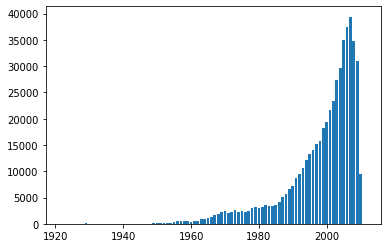

In [5]:
plt.bar(ind,values.values)

In [6]:
from sklearn.decomposition import PCA
pca_data=PCA(n_components=2)
accu=pca_data.fit_transform(audio_input)
accu

array([[-0.1923099 ,  0.06533933],
       [ 0.33158305, -0.08501843],
       [-0.17998727,  0.00853162],
       ...,
       [-0.32234284, -0.01715418],
       [ 0.11394497, -0.05168805],
       [-0.27950106,  0.02618954]])

In [7]:
from sklearn.model_selection import train_test_split
accu_train, accu_test= accu[:463715], accu[463716:]
accuOpt_train, accuOpt_test =audio_output[:463715],audio_output[463716:]

In [8]:
import numpy as np
accuOpt_train = accuOpt_train.to_numpy()
accuOpt_train

array([[2001],
       [2001],
       [2001],
       ...,
       [2007],
       [2006],
       [2007]])

In [9]:
len(accuOpt_train)

463715

In [10]:
output=[]
for i in range(len(accuOpt_train)):
    output.append(accuOpt_train[i][0])
    

In [ ]:
# from sklearn import svm
# svm_model=svm.SVC()
# svm_model.fit(accu_train, output) 

SVC()

In [ ]:
# predict=svm_model.predict(accu_test)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(accu_train, output)
#logi_output=LogisticRegression(random_state=0,max_iter=89,multi_class='multinomial').fit(accu_train, output)

In [13]:
predict_clf=clf.predict(accu_test)

In [14]:
print(predict_clf)

[1977 1977 1966 ... 1925 1977 1925]


In [16]:
accuOpt_test = accuOpt_test.to_numpy()
actual=[]
for i in range(len(accuOpt_test)):
    actual.append(accuOpt_test[i][0])
    

In [17]:
from collections import defaultdict
list1=[]
final_dict=defaultdict(int)
for i in range(len(predict_clf)):
    diff=abs(int(predict_clf[i])-int(actual[i]))
    final_dict[diff] +=1
    if diff==0 or diff==1:
        list1.append(predict_clf[i])
        
    

<BarContainer object of 86 artists>

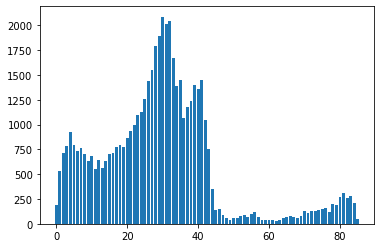

In [18]:
import matplotlib.pyplot as  plt
plt.bar(final_dict.keys(),final_dict.values())

In [19]:
final_dict=sorted(final_dict.items())
print(dict(final_dict))

{0: 194, 1: 535, 2: 716, 3: 788, 4: 922, 5: 798, 6: 733, 7: 760, 8: 704, 9: 635, 10: 685, 11: 554, 12: 647, 13: 564, 14: 632, 15: 707, 16: 717, 17: 776, 18: 797, 19: 770, 20: 862, 21: 935, 22: 996, 23: 1098, 24: 1124, 25: 1260, 26: 1440, 27: 1548, 28: 1791, 29: 1893, 30: 2086, 31: 2009, 32: 2039, 33: 1668, 34: 1384, 35: 1452, 36: 1064, 37: 1176, 38: 1232, 39: 1397, 40: 1359, 41: 1446, 42: 1043, 43: 757, 44: 348, 45: 138, 46: 151, 47: 92, 48: 54, 49: 39, 50: 56, 51: 62, 52: 82, 53: 93, 54: 70, 55: 101, 56: 114, 57: 68, 58: 35, 59: 41, 60: 34, 61: 36, 62: 29, 63: 36, 64: 58, 65: 66, 66: 76, 67: 64, 68: 63, 69: 83, 70: 132, 71: 108, 72: 133, 73: 126, 74: 139, 75: 152, 76: 163, 77: 123, 78: 197, 79: 188, 80: 272, 81: 308, 82: 262, 83: 282, 84: 209, 85: 53}


In [20]:
len(actual)

51629

In [21]:
print(list1)

[1977, 1977, 2011, 2011, 1974, 1977, 1977, 1977, 1974, 1974, 1974, 2011, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1966, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1968, 1968, 1968, 1977, 2011, 2011, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 2011, 1966, 1966, 1974, 1966, 1966, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 1977, 1974, 1974, 1974, 1974, 1974, 1974, 1966, 1974, 1974, 1974, 1977, 1977, 1977, 1977, 1977, 1974, 1968, 1968, 1977, 1977, 1977, 1977, 1977, 2011, 2011, 2011, 2011, 2011, 1977, 1974, 1974, 1974, 1974, 1977, 1977, 1977, 1977, 1977, 1977, 1974, 1974, 1974, 1974, 2011, 2011, 2011, 2011, 1968, 1968, 1968, 1966, 1966, 1968, 1968, 1968, 1966, 1966, 1966, 1968, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 1977, 196

In [23]:
print(set(predict_clf))

{1952, 1925, 1963, 1966, 1968, 1974, 1977, 2011}


In [25]:
a1=[]
p1=[]
for i in range(len(actual)):
    a1.append(actual[i]-(actual[i]%10))
    p1.append(predict_clf[i]-(predict_clf[i]%10))

In [26]:
list1=[]
final_dict1=defaultdict(int)
for i in range(len(p1)):
    diff=abs(int(p1[i])-int(a1[i]))
    final_dict1[diff] +=1

<BarContainer object of 10 artists>

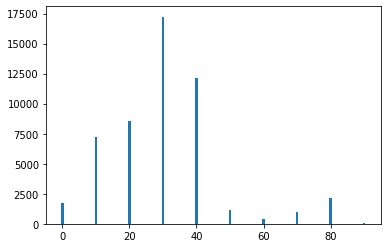

In [27]:
plt.bar(final_dict1.keys(),final_dict1.values())